In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
df_ratings = pd.read_csv('ratings.csv')

In [11]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [9]:
df_movies = pd.read_csv('movies.csv')

In [10]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
movie_data = pd.merge(df_ratings, df_movies, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [21]:
movie_data.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

In [24]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

In [25]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [27]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

In [32]:
ratings_mean_count['rating_counts']=pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [33]:
ratings_mean_count

,rating,rating_counts
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
...,...,...
loudQUIETloud: A Film About the Pixies (2006),4.500000,1
xXx (2002),2.958333,24
xXx: State of the Union (2005),2.071429,7


<AxesSubplot:>

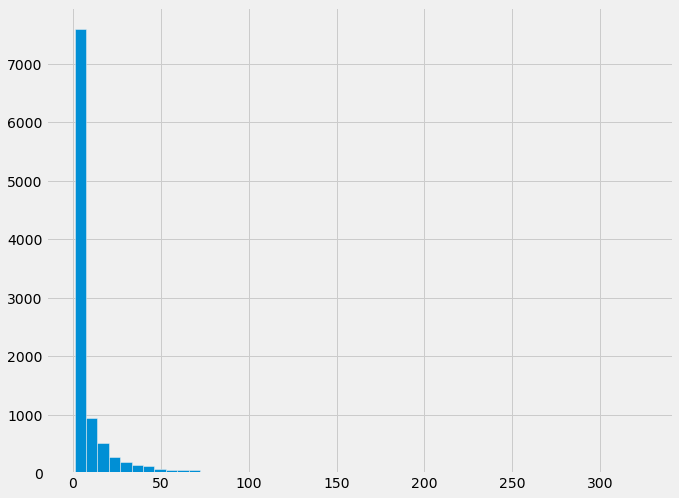

In [35]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor']=True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

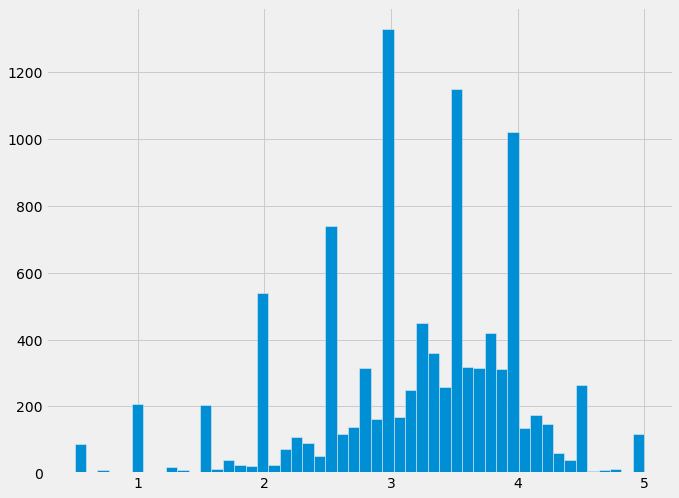

In [36]:
plt.figure(figsize=(10,8))
ratings_mean_count['rating'].hist(bins=50)

<Figure size 720x576 with 0 Axes>

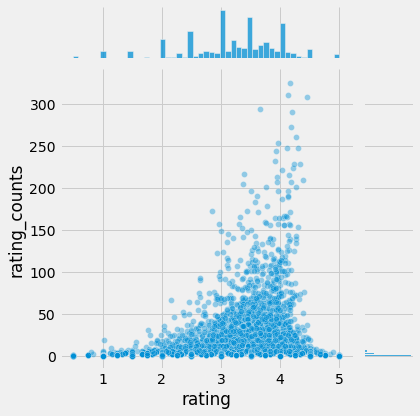

In [40]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor']=True
sns.jointplot(x='rating', y='rating_counts',data = ratings_mean_count,alpha=0.4)

In [41]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
forrest_gump_ratings

userId
1      3.0
2      NaN
3      3.0
4      NaN
5      NaN
      ... 
664    5.0
665    4.0
666    NaN
667    4.5
668    4.0
Name: Forrest Gump (1994), Length: 668, dtype: float64

In [44]:
movies_like_forrest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

C:\Users\ahn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ahn\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
corr_forrest_gump = pd.DataFrame(movies_like_forrest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump

,Correlation
title,
"'burbs, The (1989)",0.056266
(500) Days of Summer (2009),0.144325
*batteries not included (1987),0.000000
...And Justice for All (1979),0.089924
10 (1979),0.693375
...,...
[REC]² (2009),0.837708
eXistenZ (1999),0.025067
xXx (2002),0.096972


In [47]:
corr_forrest_gump.sort_values('Correlation', ascending=False)

,Correlation
title,
Martian Child (2007),1.0
Save the Tiger (1973),1.0
Underworld (1996),1.0
Shortbus (2006),1.0
"Court Jester, The (1956)",1.0
...,...
Love in the Afternoon (Chloe in the Afternoon) (L'amour l'après-midi) (1972),-1.0
What Ever Happened to Baby Jane? (1962),-1.0
Tango (1998),-1.0


In [49]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.056266,20
(500) Days of Summer (2009),0.144325,37
*batteries not included (1987),0.000000,11
...And Justice for All (1979),0.089924,10
10 (1979),0.693375,3


In [51]:
corr_forrest_gump[corr_forrest_gump['rating_counts']>50].sort_values('Correlation',ascending = False).head()

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,311
Happy Gilmore (1996),0.715602,79
12 Angry Men (1957),0.545139,63
As Good as It Gets (1997),0.521448,98
First Knight (1995),0.520438,52
